<a href="https://colab.research.google.com/github/vladi29/ANA-Classifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Universidad Simon Bolivar - 21 de Enero de 2022
# Trabajo final de grado: Clasificador de patrones ANA
# Vladimir Alfaro - 1510023

# Preprocesamiento de las imagenes

import pandas as pd
import time
import cv2
from torchvision import transforms
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Directorios

#%cd drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database/
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/AIDA_HEp2_GroundTruth.xlsx'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database'

df = pd.read_excel(labels_path, header = 0)
shuffled_df = df.sample(frac = 1).reset_index(drop = True)
shuffled_df.to_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')

data = pd.read_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')
labels_list = data['StainingPatterns'].values.tolist()
images_raw = data['ImageFileName'].values.tolist()
images = []
for name in images_raw:
  images.append(name.lower())

In [ ]:
start_time = time.time()
images_list = []
i = 0
for image in images:
    i += 1
    print("Imagenes: ", i)
    image_path = images_path + '/' + image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))                               # Tamaño de las imagenes (ancho, alto) | 224x224 es el tama;o minimo de los modelos famosos en pytorch
    green_image = image[:,:,1]                                          # Extraemos el canal verde de de cada imagen
    image = np.zeros(image.shape)                                       # Imagen vacia
    image[:,:,1] = green_image                                          # Sustituimos el canal verde en la imagen vacia, [2]
    image = (image - np.min(image))/(np.max(image) - np.min(image))     # Preprocesamiento para evitar ruido, [2] y [8]
    images_list.append(image)

final_time = time.time() - start_time
print('Tiempo de preprocesado de las images:', round(final_time/60, 3))

labels = np.asarray(labels_list)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv', labels, fmt ='%s', delimiter = ',')

names = np.asarray(images)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv', names, fmt ='%s', delimiter = ',')

images_compressed = np.asarray(images_list)
np.savez_compressed('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/images.npz', images_compressed)

Imagenes:  1
Imagenes:  2
Imagenes:  3
Imagenes:  4
Imagenes:  5
Imagenes:  6
Imagenes:  7
Imagenes:  8
Imagenes:  9
Imagenes:  10
Imagenes:  11
Imagenes:  12
Imagenes:  13
Imagenes:  14
Imagenes:  15
Imagenes:  16
Imagenes:  17
Imagenes:  18
Imagenes:  19
Imagenes:  20
Imagenes:  21
Imagenes:  22
Imagenes:  23
Imagenes:  24
Imagenes:  25
Imagenes:  26
Imagenes:  27
Imagenes:  28
Imagenes:  29
Imagenes:  30
Imagenes:  31
Imagenes:  32
Imagenes:  33
Imagenes:  34
Imagenes:  35
Imagenes:  36
Imagenes:  37
Imagenes:  38
Imagenes:  39
Imagenes:  40
Imagenes:  41
Imagenes:  42
Imagenes:  43
Imagenes:  44
Imagenes:  45
Imagenes:  46
Imagenes:  47
Imagenes:  48
Imagenes:  49
Imagenes:  50
Imagenes:  51
Imagenes:  52
Imagenes:  53
Imagenes:  54
Imagenes:  55
Imagenes:  56
Imagenes:  57
Imagenes:  58
Imagenes:  59
Imagenes:  60
Imagenes:  61
Imagenes:  62
Imagenes:  63
Imagenes:  64
Imagenes:  65
Imagenes:  66
Imagenes:  67
Imagenes:  68
Imagenes:  69
Imagenes:  70
Imagenes:  71
Imagenes:  72
I

In [ ]:
#----------Get all labels----------
aux = ''
patterns = {}
for pattern in labels_list:
  if pattern != aux:
    patterns[pattern] = labels_list.count(pattern)
    aux = pattern
  else:
    continue

print(patterns)
print('Numero de patrones en el dataset: ', len(patterns))

{'NuclearHomogeneous_NucleolarHomogeneous_CytoplasmicSpeckled': 9, 'Negative': 581, 'NuclearHomogeneous_NucleolarHomogeneous': 24, 'NuclearHomogeneous_CytoplasmicReticularAMA_NuclearMembranous': 3, 'FewNuclearDots_CytoplasmicSpeckled': 6, 'NucleolarSpeckled': 23, 'NuclearMembranous_FineSpeckled': 26, 'NuclearMembranous': 23, 'FineSpeckled_CytoplasmicSpeckled': 23, 'NucleolarClumpy': 21, 'NuclearHomogeneous_NucleolarHomogeneous_CytoplasmicReticularAMA': 15, 'NuclearHomogeneous_FineSpeckled': 24, 'FineSpeckled_NucleolarSpeckled': 24, 'NuclearMembranous_NucleolarSpeckled': 24, 'NucleolarClumpy_CytoplasmicSpeckled': 6, 'NucleolarHomogeneous': 21, 'FewNuclearDots': 23, 'FineSpeckled_NucleolarClumpy': 29, 'NuclearMembranous_CytoplasmicPolarGolgiLike': 3, 'FineSpeckled_NucleolarHomogeneous_Centriole': 5, 'Centromere_CytoplasmicReticularAMA': 30, 'NuclearHomogeneous_CytoplasmicFibrillar': 28, 'NuclearHomogeneous_NucleolarClumpy': 24, 'DSF-70': 21, 'Centriole': 15, 'NuclearMembranous_Cytoplasmi

In [ ]:
#----------Verificar el estado de la memoria RAM----------
#!cat /proc/meminfo

Image name:  ['268_3.jpg']
Label:  NuclearHomogeneous_CytoplasmicReticularAMA
Image name:  ['37_2.bmp']
Label:  CoarseSpeckled_CytoplasmicReticularAMA
Image name:  ['36_3.jpg']
Label:  CoarseSpeckled_CytoplasmicFibrillar
Image name:  ['429_1.jpg']
Label:  NucleolarClumpy_CytoplasmicSpeckled
Image name:  ['163_2.jpg']
Label:  FineSpeckled_FewNuclearDots_CytoplasmicFibrillar
Image name:  ['62_2.bmp']
Label:  CytoplasmicFibrillar


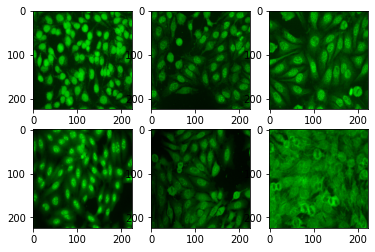

In [ ]:
# Prueba de imagenes con etiquetas

labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv'
names_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/images.npz'

labels_raw = pd.read_csv(labels_path, header = None)
labels_raw = labels_raw.values.tolist()
labels = []
for label in labels_raw:
  labels.append(label[0])

names = pd.read_csv(names_path, header = None)
names = names.values.tolist()

images = np.load(images_path)
images = images['arr_0']

images_list = []
labels_list = []
names_list = []

for i in range(0, 6):
    A = random.randint(0, 2079)
    images_list.append(images[A])
    labels_list.append(labels[A])
    names_list.append(names[A])

for i in range(0,6):
    plt.subplot(2,3, i+1)
    imagen = images_list[i]
    print("Image name: ", names_list[i])
    print("Label: ", labels_list[i])
    plt.imshow(imagen)
plt.show()